In [1]:
from fastai.text import *
import matplotlib.pyplot as plt
from statistics import mean, median, mode

In [2]:
df_train = pd.read_csv('../train/curekart_train.csv')
df_train.head()

,label,sentence
0,CALL_CENTER,What time is your call centre operational duri...
1,CALL_CENTER,is the call center still functioning during lo...
2,CALL_CENTER,what are the working hours of your call center...
3,CALL_CENTER,does covid affext your call center time
4,CALL_CENTER,is your call center working during covid?


In [3]:
df_train.shape

(600, 2)

In [4]:
df_test = pd.read_csv('../test/curekart_test.csv')
df_test.head()

,sentence,label
0,Order my product,ORDER_TAKING
1,Hy,NO_NODES_DETECTED
2,I want to order Wottle sensitive handwash refill,RECOMMEND_PRODUCT
3,have u started C D provision for pin code 702164,CHECK_PINCODE
4,How do I know it will deliver in my place,NO_NODES_DETECTED


In [5]:
df_test.shape

(991, 2)

In [6]:
# No. of Inscope queries, No. of OOS queries
print('Inscope queries in Test set: ', df_test[df_test['label']!='NO_NODES_DETECTED'].shape[0])
print('OOS queries in Test set: ', df_test[df_test['label']=='NO_NODES_DETECTED'].shape[0])

Inscope queries in Test set:  452
OOS queries in Test set:  539


In [7]:
# No of classes
print('No of classes: ', len(set(df_train['label'])))

No of classes:  28


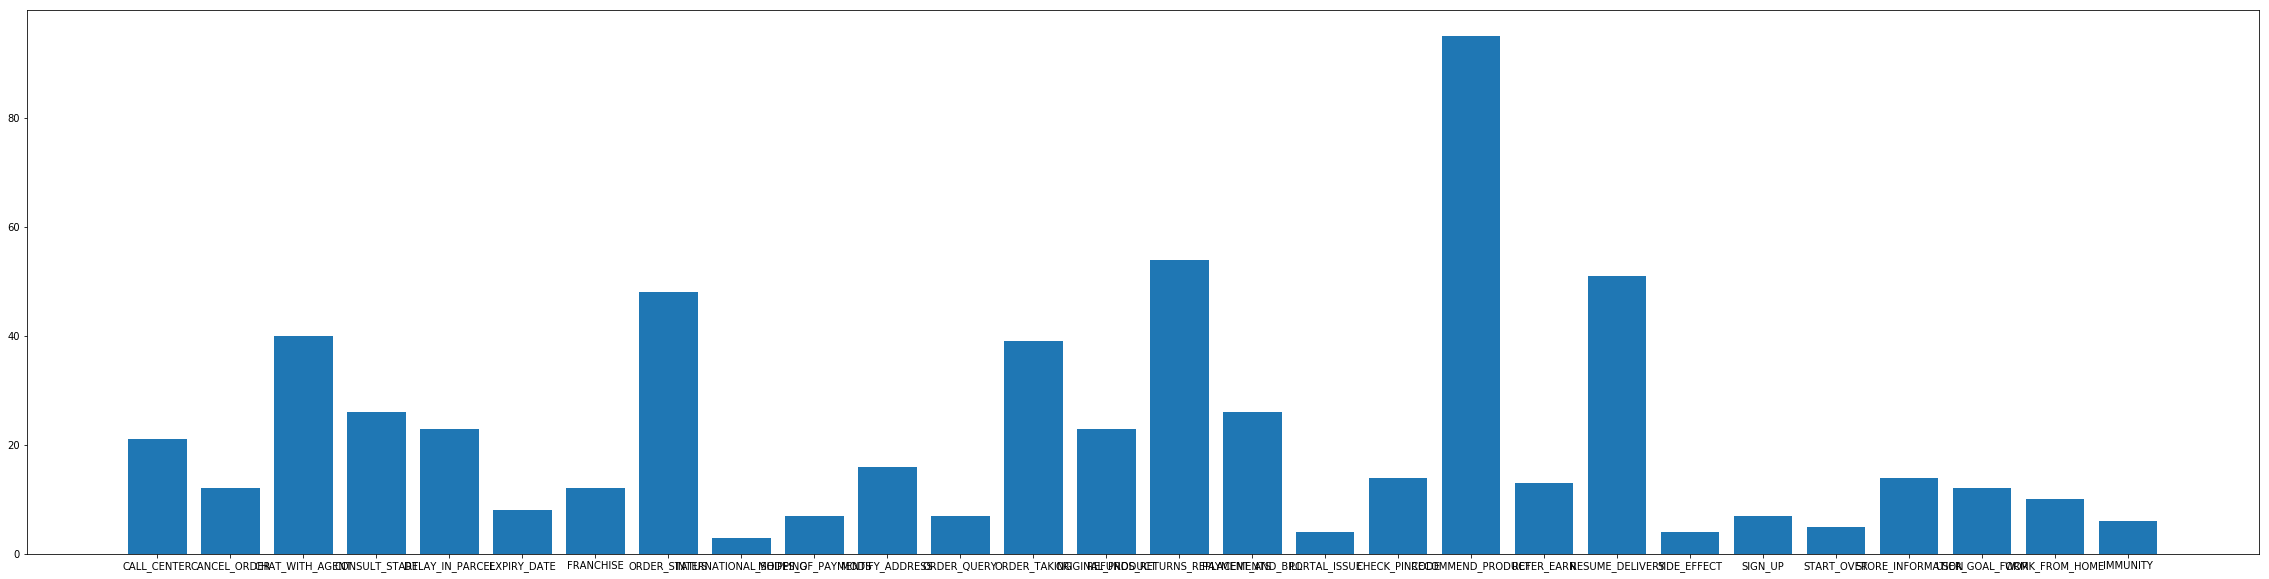

In [8]:
# Class distribution in training set
D = Counter(df_train['label'])
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [9]:
# Min, Max, Avg no of sentences per class in Training set
print('Min no. of sentences: ', min(D.values()))
print('Max no. of sentences: ', max(D.values()))
print('Avg no. of sentences: ', mean(D.values()))
print('Median of sentences: ', median(D.values()))

Min no. of sentences:  3
Max no. of sentences:  95
Avg no. of sentences:  21.428571428571427
Median of sentences:  13.5


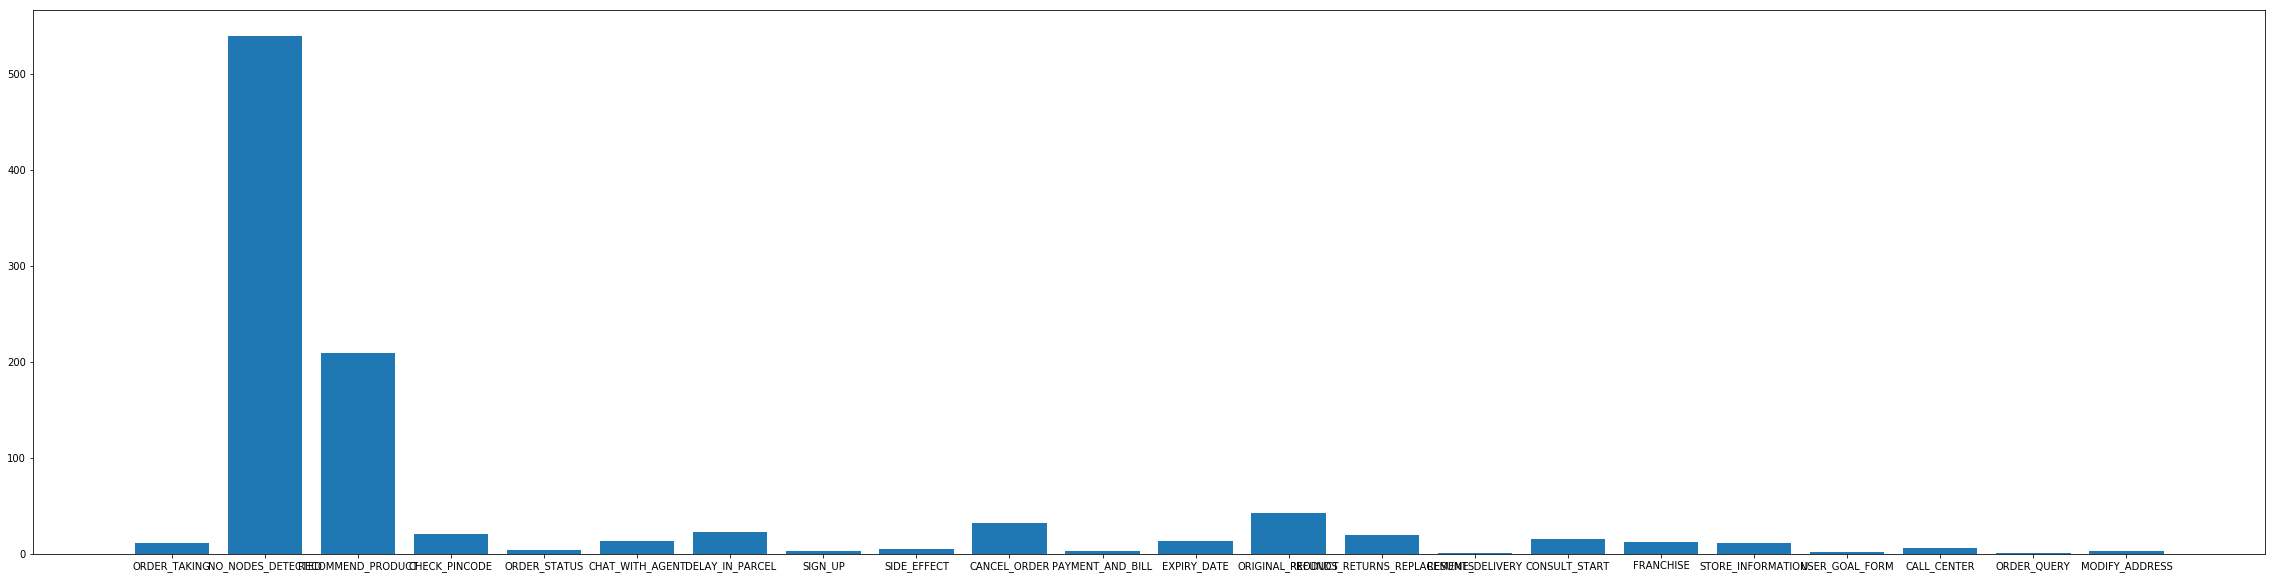

In [10]:
# Class distribution in test set
D = Counter(df_test['label'])
plt.rcParams["figure.figsize"] = (40,10)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

In [11]:
# OOV words/Domain specific words and Spelling mistakes in train set
with open("/home/ubuntu/gaurav/.fastai/models/wt103-fwd/itos_wt103.pkl", "rb") as input_file:
    wiki_itos = pickle.load(input_file)
tok = SpacyTokenizer('en')
oov_tokens = []
for index, row in df_train.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t not in wiki_itos:
            oov_tokens.append(t)
oov_tokens = list(set(oov_tokens))
print(oov_tokens)

[' ', 'recieve', 'dumbbell', 'cani', '.how', 'hii', 'paymets', 'wts', 'syntha', 'coronvirus', 'prepay', 'covid', 'ther', 'banglore', 'whould', 'covid-19', 'refral', 'àre', 'curekart', 'addres', '’s', 'expacted', 'lein', 'publised', 'hairfall', 'debited', 'biotin', 'referal', 'heathkart', "n't", 'tricep', 'multivitamin', 'detox', 'becuase', 'pls', 'pincode', 'dumbbells', 'refferal', 'triceps', 'prepaid', 'reachable', 'authenticate', 'arginine', 'plz', 'invoice', 'multivitamins', 'reedem', "'m", 'bulking', 'deliverable', 'whey', 'isopure', 'covid19', 'orignal', 'affext', 'bodybuilding', 'creatine', 'supergainer', 'producs', 'dumbells', 'essestial', 'bcaa', 'musclemass', 'coronavirus', 'recieved']


In [13]:
# OOV words/Domain specific words and Spelling mistakes in test set
with open("/home/ubuntu/gaurav/.fastai/models/wt103-fwd/itos_wt103.pkl", "rb") as input_file:
    wiki_itos = pickle.load(input_file)
tok = SpacyTokenizer('en')
oov_tokens = []
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t not in wiki_itos:
            oov_tokens.append(t)
oov_tokens = list(set(oov_tokens))
print(oov_tokens)

['rivamal', 'now.plz', 'alivea', 'ndia', 'thankuhh', 'porotin', 'btao', '6lbs', 'wigzin', 'diabeti', '50%off', 'lopi', 'inditify', 'combogia', 'thermocut', 'tuffco', 'halal', 'लगता', '.it', 'adar', 'availanle', "n't", 'voster', 'aap', 'multivitamin', 'konsa', 'reassesment', 'sinrar', 'veg', 'oxymeter', 'weracin', 'ramnagar', 'sahi', 'biozyme', 'dayanand', 'ringworm', '🖐', 'jents', 'tryn', 'gainz', 'diff', 'sakr', 'नंबर', 'abouy', 'glucometer', 'hkbeginners', '\n', 'recomand', 'aarondeadly@gmail.com', 'whieght', 'ite', 'protien', 'tamron', 'nonvegitarian', 'किया', 'dawa', 'vencil', 'dite', 'ths', 'creatine', 'plzzz', 'equipments', 'amnio', 'differnt', 'bidhanu', 'cambogia', 'you.notify', 'मिलेगा', 'mujhe', 'frnds', 'रस', '10.16', 'ऑनलाइन', 'khaye', '24/7', 'hihiiiii', 'recammend', '.my', 'curekart', 'पास', 'digestible', 'livercare', 'peddlin', 'payapp', 'shampoo', 'thankyou', 'neuropathy', 'आप', 'biotin', '7120', '8712', 'deliverable', 'giddalur', 'barofil', 'durgapur', 'redith', '🏻', '

In [15]:
# Few examples of code-mixed sentences in test set
hinglish_words = ['kitne', 'gya', 'aava', 'irukum', 'chahie', 'chahte', 'sukha']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in hinglish_words:
            print(row['sentence'])
            break

Sir may Apne boodi Ko Mota bnana chahte hai kya khaye Javan de
Bhai sneaker sath aava ga
Kitne Whieght ka h
3 kg ko chahie y
Kya muscles repairs k liye creatinine monohydrate sahi rahega.khichaw hi gya hai muscles me
Bhai 1000kg. Kitne ka h
Weight gain kitne time me kr leta hai
Unaku evalo kolupu irukum na ketta onnumey solamatra


In [16]:
# Few examples of spelling mistakes in test set
spelling_mistakes = ['aunthentic', 'producr', 'ornage', 'avilable', 'authticity']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in spelling_mistakes:
            print(row['sentence'])
            break

lopi ornage flavour
How to check aunthentic or without authentic
Is there any authticity mark on products
I am 82 years old... I want to buy melatonin 10mg..can you suggest a good producr
Ensure diabeti care is avilable


In [17]:
# Few examples of slangs in test set
slang_words = ['ssup', 'lyk', 'kand', 'jst', 'pls', 'wats', 'plz', 'v', 'u']
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    for t in tokens:
        if t in slang_words:
            print(row['sentence'])
            break

have u started C D provision for pin code 702164
Fluoride toothpaste price pls
ok , pls call at 7021645199
can't u do that
Pls tell price of peddlin cycle
what u recommend for best multivitamin
if the product is open then also u will take it back
if ur product is fake will u take it back ?
U send to Singapore
U r giving pathetic service it was prepaid order only
Hii I want to loss weight can u gave me diet plan
Hoi sir pls send me Ur address
U guys don't deliver in time
Pls send address Kolkata retail  store
U all are useless
Plz order my product
Hii...plz recommend me best fat burner product
Can u delivered to ramnagar uttarakhand
It shows that this product can not be delivered at 7021645199 right now.Plz let me inform when it will be possible. Thank u
Can u give me a diet chart, I am 47 years old, no medical problem want to loose fat
Plz cancel my all order
hlo i want to gain mass can u please help me out
U have pureol biotin 10000mcg
Do u have bp apparatus?
Hi team,my order delivery

In [19]:
# variation in length of sentences in train set
len_of_tokens = []
for index, row in df_train.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  27
Avg no. of tokens:  6.29
Median of no. of tokens:  6.0


In [20]:
# variation in length of sentences in test set
len_of_tokens = []
for index, row in df_test.iterrows():
    tokens = tok.tokenizer((row['sentence']).lower())
    len_of_tokens.append(len(tokens))
print('Min no. of tokens: ', min(len_of_tokens))
print('Max no. of tokens: ', max(len_of_tokens))
print('Avg no. of tokens: ', mean(len_of_tokens))
print('Median of no. of tokens: ', median(len_of_tokens))

Min no. of tokens:  1
Max no. of tokens:  44
Avg no. of tokens:  6.4278506559031285
Median of no. of tokens:  6


In [21]:
# are there any queries in other than latin script in train set
def is_english(s: str) -> bool:
    if len(re.findall(u'[\u0900-\u097F]', s)):
        return False
    return True

for index, row in df_train.iterrows():
    if not is_english(row['sentence']):
        print(row['sentence'])

In [22]:
# are there any queries in other than latin script in test set
def is_english(s: str) -> bool:
    if len(re.findall(u'[\u0900-\u097F]', s)):
        return False
    return True

for index, row in df_test.iterrows():
    if not is_english(row['sentence']):
        print(row['sentence'])

क्या आप के पास शीशम रस मिलेगा
मैंने ऑनलाइन ऑर्डर किया था उसमें मेरा नंबर गलत हो गया है
खाया पिया नहीं लगता क्या करें
क्या बोलता भाई
